In [2]:
#load data from excel format
import pandas as pd
import numpy as np
df = pd.read_excel(open('default of credit card clients.xls','rb'),sheetname='Data') 
df.head(10)

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


In [3]:
# select feature list
feature_list = ['X6', 
'X7', 
'X8',
'X9',
'X10' ,
'X11' ,
'X1'  ,
'X18' ,
'X19' ,
'X21' ,
'X20' ,
'X22' ,
'X23' ,
'X2'  ,
'X3'  ,
'X4'  ,
'X12' ,
'X13' ,
'X14' ]



In [4]:
# using selected feature to get new features 
X = df[feature_list]
y = df.Y


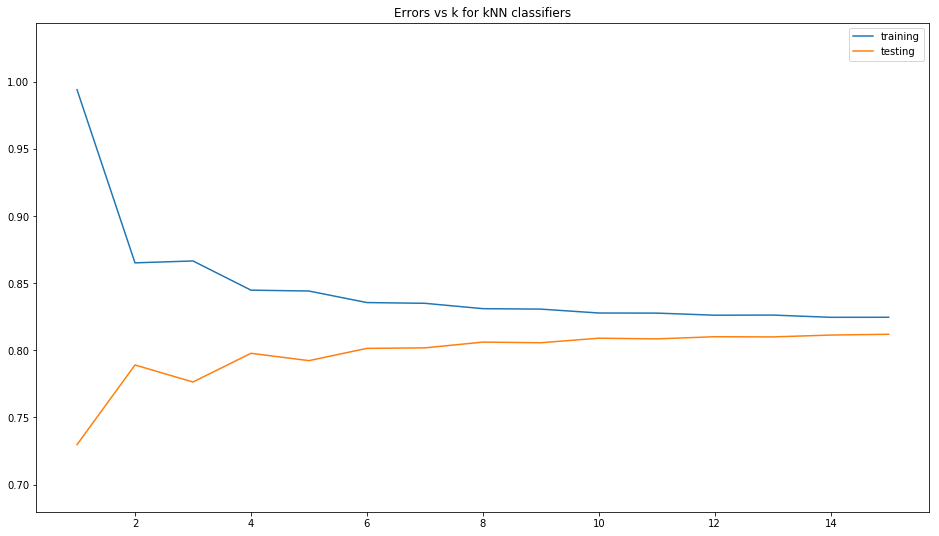

In [5]:
from sklearn.cross_validation import KFold
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
#scalar Before classification, we need to normalize the data first.
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)

#cross validation seed
n_folds = 10
kf = KFold(n=len(X), n_folds=n_folds, shuffle=True, random_state=42)
#KNN classifier
def test_KNN(train_X, train_y, test_X, test_y, n_neighbors=3, weights='uniform', p=2, debug_flag = False):
    neigh = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, p=p)
    neigh.fit(train_X, train_y)
    train_error = neigh.score(train_X, train_y)
    test_error = neigh.score(test_X, test_y)
    if debug_flag:
        print('=============')
        print('training error:\t{}'.format(train_error))
        print('testing error:\t{}'.format(test_error))
    return train_error, test_error
def cv(n_neighbors=3,weights='uniform',p=2):
    train_error_total = 0
    test_error_total = 0
    for train, test in kf:
        train_X = X_scaled[train]
        test_X = X_scaled[test]
        train_y = y.iloc[train]
        test_y = y.iloc[test]
        train_error, test_error = test_KNN(train_X, train_y, test_X, test_y, n_neighbors, weights, p)
        train_error_total += train_error
        test_error_total += test_error
    return train_error_total/n_folds, test_error_total/n_folds
def cv_plot(weights='uniform',p=2):
    cv_res = []
    for i in range(1,16):
        train_error, test_error = cv(i, weights, p)
        cv_res.append([i, train_error, test_error])
    cv_res_arr = np.array(cv_res)
    plt.figure(figsize=(16,9)) 
    plt.title('Errors vs k for kNN classifiers')
    plot_train, = plt.plot(cv_res_arr[:,0], cv_res_arr[:,1], label='training')
    plot_test, = plt.plot(cv_res_arr[:,0], cv_res_arr[:,2], label='testing')
    plt.legend(handles=[plot_train, plot_test])
    plt.ylim((min(min(cv_res_arr[:,1]), min(cv_res_arr[:,2])) - 0.05, max(max(cv_res_arr[:,1]), max(cv_res_arr[:,2]))+0.05))
cv_plot('uniform',2)

In [6]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier


l = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    min_max_scaler = preprocessing.RobustScaler()
    x_train_scaled = min_max_scaler.fit_transform(X_train[X_train.columns[0:19]])
    x_test_scaled = min_max_scaler.fit_transform(X_test[X_test.columns[0:19]])
    X_train_robust = pd.DataFrame(x_train_scaled)
    X_test_robust = pd.DataFrame(x_test_scaled)
    
    neigh = KNeighborsClassifier(n_neighbors=8,weights='uniform',p=2)
    neigh.fit(X_train_robust, y_train)
    y_pred_class = neigh.predict(X_test_robust)

    l.append(f1_score(y_test, y_pred_class, average='micro'))
    print('Round{} : '.format(i))
    print(neigh.score(X_train_robust,y_train))
    print(neigh.score(X_test_robust,y_test))
    print(f1_score(y_test, y_pred_class, average='micro'))
    print(metrics.classification_report(y_test, y_pred_class))
    print('#################################')
print(sum(l)/10)

Round0 : 
0.829916666667
0.803666666667
0.803666666667
             precision    recall  f1-score   support

          0       0.82      0.95      0.88      4623
          1       0.65      0.31      0.42      1377

avg / total       0.78      0.80      0.78      6000

#################################
Round1 : 
0.829916666667
0.803833333333
0.803833333333
             precision    recall  f1-score   support

          0       0.82      0.95      0.88      4665
          1       0.63      0.29      0.40      1335

avg / total       0.78      0.80      0.78      6000

#################################
Round2 : 
0.829875
0.811
0.811
             precision    recall  f1-score   support

          0       0.83      0.95      0.89      4671
          1       0.65      0.32      0.43      1329

avg / total       0.79      0.81      0.78      6000

#################################
Round3 : 
0.831458333333
0.802333333333
0.802333333333
             precision    recall  f1-score   support

   